# Friends of Tracking: Lesson 2
> Solutions of the challenges

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]

In [0]:
#hide
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#hide
%cd /content/drive/My Drive/Colab Notebooks/Futebol

/content/drive/My Drive/Colab Notebooks/Futebol


In [0]:
#hide
!ls

 1LoadInData.py		    'FoT lesson2.ipynb'   lib_util.py
 2PlotShotsAndPasses.py      lib_colab.py	  __pycache__
 artigos		     lib_FCPython.py	  PyFootballPitch
 campos_varias_fontes.jfif   Lib_football.ipynb   statsbombpy
 Data			     lib_probability.py
 football-crunching	     lib_statsbomb.py


# Import

In [0]:
#from lib_util import display_all, flatten_json
from lib_util import *
from lib_statsbomb import find_entry_1stlevel, find_entry_2ndlevel, find_entry_3rdlevel, find_not_empty
from lib_FCPython import createPitch

import pandas as pd
import numpy as np
from numpy import nan

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns

import math

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Statsbomb

## Competition

In [0]:
#hide
path = 'drive/My Drive/Colab Notebooks/Futebol/Data/statsbomb/open-data/data/'
path = 'Data/statsbomb/open-data/data/'

In [0]:
df_comp = pd.read_json(path + 'competitions.json')

df_comp.shape
display_all(df_comp,20,8)

(20, 8)

,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
0,37,42,England,FA Women's Super League,female,2019/2020,2020-03-11T14:09:41.932138,2020-03-11T14:09:41.932138
1,37,4,England,FA Women's Super League,female,2018/2019,2020-02-27T15:59:58.148,2020-02-27T15:59:58.148
2,43,3,International,FIFA World Cup,male,2018,2019-12-16T23:09:16.168756,2019-12-16T23:09:16.168756
3,11,4,Spain,La Liga,male,2018/2019,2020-02-27T12:19:39.458017,2020-02-27T12:19:39.458017
4,11,1,Spain,La Liga,male,2017/2018,2020-02-27T12:19:39.458017,2020-02-27T12:19:39.458017
5,11,2,Spain,La Liga,male,2016/2017,2020-04-01T14:15:08.846728,2019-12-16T23:09:16.168756
6,11,27,Spain,La Liga,male,2015/2016,2019-12-16T23:09:16.168756,2019-12-16T23:09:16.168756
7,11,26,Spain,La Liga,male,2014/2015,2019-12-16T23:09:16.168756,2019-12-16T23:09:16.168756
8,11,25,Spain,La Liga,male,2013/2014,2019-12-16T23:09:16.168756,2019-12-16T23:09:16.168756
9,11,24,Spain,La Liga,male,2012/2013,2019-12-16T23:09:16.168756,2019-12-16T23:09:16.168756


In [0]:
competition_id = 72

## Matches

In [0]:
df_matches =  pd.read_json(path + f'matches/{str(competition_id)}/30.json')
df_matches.shape
df_matches.head(2)

(52, 16)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,last_updated,metadata,match_week,competition_stage,stadium,referee
0,68338,2019-06-19,21:00:00.000,"{'competition_id': 72, 'country_name': 'Intern...","{'season_id': 30, 'season_name': '2019'}","{'home_team_id': 866, 'home_team_name': 'Scotl...","{'away_team_id': 1204, 'away_team_name': 'Arge...",3,3,available,2019-12-16T23:09:16.168756,"{'data_version': '1.1.0', 'shot_fidelity_versi...",3,"{'id': 1, 'name': 'Regular Season'}",NaN,NaN
1,68357,2019-06-22,21:00:00.000,"{'competition_id': 72, 'country_name': 'Intern...","{'season_id': 30, 'season_name': '2019'}","{'home_team_id': 852, 'home_team_name': 'Norwa...","{'away_team_id': 1205, 'away_team_name': 'Aust...",1,1,available,2020-02-27T12:19:39.458017,"{'data_version': '1.1.0', 'shot_fidelity_versi...",4,"{'id': 1, 'name': 'Regular Season'}",NaN,NaN


In [0]:
for i in range(df_matches.shape[0]):
  home_team_name = df_matches['home_team'][i]['home_team_name']
  away_team_name = df_matches['away_team'][i]['away_team_name']
  home_score = df_matches['home_score'][i]
  away_score = df_matches['away_score'][i]
  competition_stage = df_matches['competition_stage'][i]['name']

  print(f'{i} {home_team_name} {home_score} - {away_score} {away_team_name}     ......   {competition_stage}')

0 Scotland Women's 3 - 3 Argentina Women's     ......   Regular Season
1 Norway Women's 1 - 1 Australia Women's     ......   Regular Season
2 Spain Women's 1 - 2 United States Women's     ......   Round of 16
3 Sweden Women's 1 - 0 Canada Women's     ......   Regular Season
4 Spain Women's 3 - 1 South Africa Women's     ......   Regular Season
5 Germany Women's 1 - 0 China PR Women's     ......   Regular Season
6 Brazil Women's 3 - 0 Jamaica Women's     ......   Regular Season
7 England Women's 2 - 1 Scotland Women's     ......   Regular Season
8 Australia Women's 1 - 2 Italy Women's     ......   Regular Season
9 Argentina Women's 0 - 0 Japan Women's     ......   Regular Season
10 Canada Women's 1 - 0 Cameroon Women's     ......   Regular Season
11 Chile Women's 0 - 2 Sweden Women's     ......   Regular Season
12 New Zealand Women's 0 - 1 Netherlands Women's     ......   Regular Season
13 United States Women's 13 - 0 Thailand Women's     ......   Regular Season
14 Nigeria Women's 2 - 0

In [0]:
df_matches.loc[48]['away_team']

{'away_team_gender': 'female',
 'away_team_group': 'Group F',
 'away_team_id': 858,
 'away_team_name': "Sweden Women's",
 'country': {'id': 220, 'name': 'Sweden'}}

In [0]:
match_id = 69301
home_team_id_required = 865 # England
home_team_required = "England Women's" # England

away_team_id_required = 858 # Sweden
away_team_required = "Sweden Women's" # Sweden


## Events

In [0]:
df_events =  pd.read_json(path + f'events/{str(match_id)}.json')

df_shots_flatten =  pd.DataFrame([flatten_json(x) for x in df_events['shot']])

In [0]:
df_shots_flatten.shape
print()
df_events.shape

(3291, 157)

(3291, 37)

### Shots

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

% not empty: 0.58%


Text(80, 75, "England Women's shots")

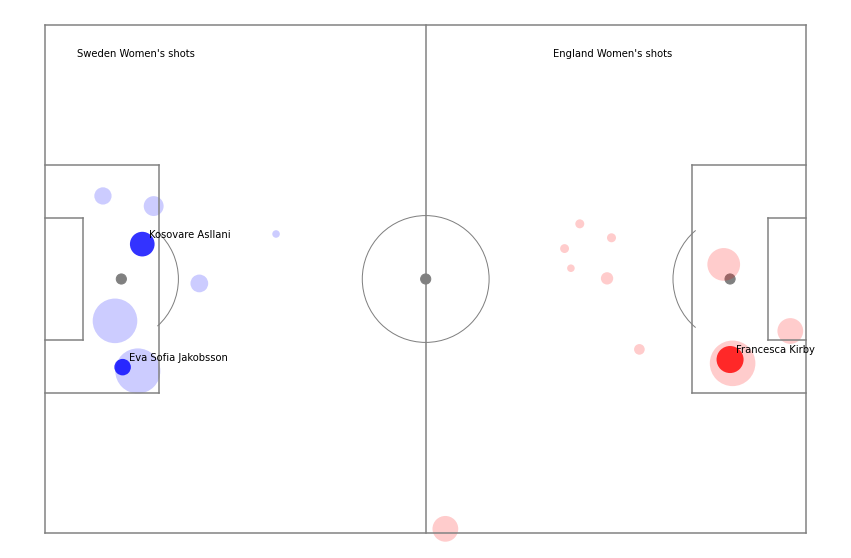

In [0]:
pitchLengthX= 120
pitchWidthY = 80

#lista = find_entry_3rdlevel(df_events['shot'],'outcome','name','Goal')
#print(lista)

lista = find_not_empty(df_events['shot'])

fig=plt.figure(figsize=(15, 10))
ax=fig.add_subplot(1,1,1)

createPitch(ax, pitchLengthX, pitchWidthY,'yards')

for i in lista:
  #location
  x = df_events['location'].loc[i][0]
  y = df_events['location'].loc[i][1]

  #COLOR = 'red'
  #if df_shots_flatten.loc[i]['outcome_name'] == 'Goal': COLOR = 'blue'

  #circleSize = 2
  circleSize = np.sqrt(df_shots_flatten.loc[i]['statsbomb_xg']*45)

  if df_events.loc[i]['team']['id'] == home_team_id_required: 
    COLOR = 'red'
    shotCircle = plt.Circle( ( x, pitchWidthY-y ), circleSize, facecolor = COLOR)
    shotCircle.set_alpha(0.2)
    if df_shots_flatten.loc[i]['outcome_name'] == 'Goal': 
      shotCircle.set_alpha(0.8)
      plt.text((x+1), (pitchWidthY-y+1), df_events.iloc[i]['player']['name'])      

  else:
    COLOR = 'blue'
    shotCircle = plt.Circle( ( pitchLengthX-x, y ), circleSize, facecolor = COLOR)
    shotCircle.set_alpha(0.2)
    if df_shots_flatten.loc[i]['outcome_name'] == 'Goal': 
      shotCircle.set_alpha(0.8)
      plt.text((pitchLengthX-x+1), (y+1), df_events.iloc[i]['player']['name'])


  ax.add_patch(shotCircle)

plt.text( 5, 75, away_team_required + ' shots') 
plt.text(80, 75, home_team_required + ' shots') 



### Passes

% not empty: 27.99%


Text(80, 75, "England Women's passes")

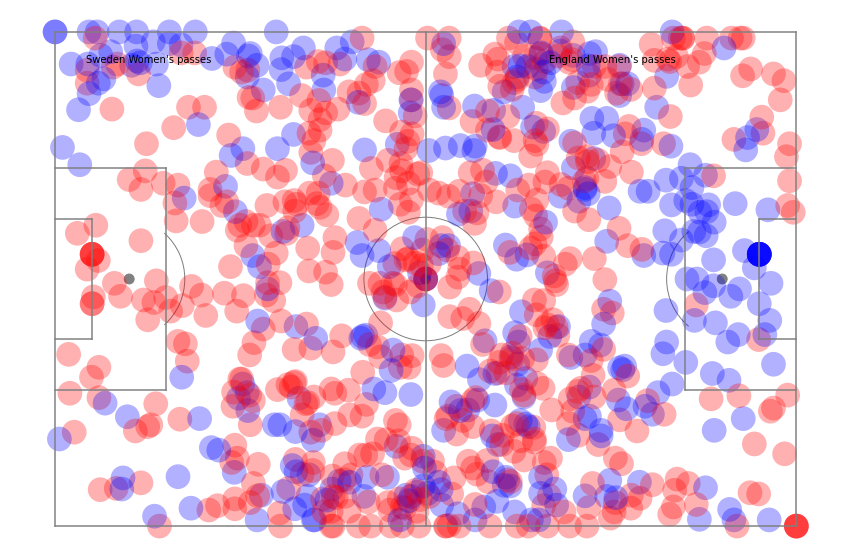

In [0]:
pitchLengthX= 120
pitchWidthY = 80

#lista = find_entry_3rdlevel(df_events['shot'],'outcome','name','Goal')
#print(lista)

lista = find_not_empty(df_events['pass'])

fig=plt.figure(figsize=(15, 10))
ax=fig.add_subplot(1,1,1)

createPitch(ax, pitchLengthX, pitchWidthY,'yards')

for i in lista:
  #location
  x = df_events['location'].loc[i][0]
  y = df_events['location'].loc[i][1]

  circleSize = 2
  
  if df_events.loc[i]['team']['id'] == home_team_id_required: 
    COLOR = 'red'
    shotCircle = plt.Circle( ( x, pitchWidthY-y ), circleSize, facecolor = COLOR)
    shotCircle.set_alpha(0.3)

  else:
    COLOR = 'blue'
    shotCircle = plt.Circle( ( pitchLengthX-x, y ), circleSize, facecolor = COLOR)
    shotCircle.set_alpha(0.3)

  ax.add_patch(shotCircle)

plt.text( 5, 75, away_team_required + ' passes') 
plt.text(80, 75, home_team_required + ' passes') 

### Sweden's passes

% not empty: 27.99%


Text(5, 75, "Sweden Women's passes")

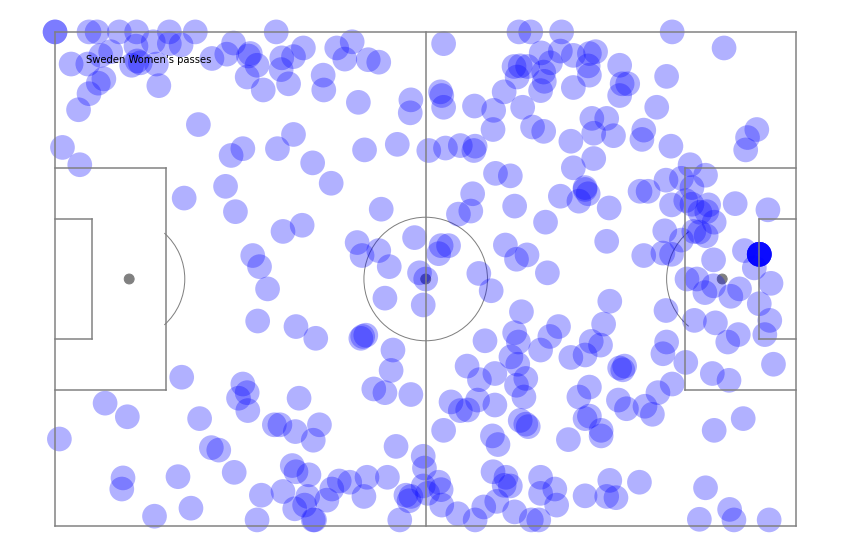

In [0]:
pitchLengthX= 120
pitchWidthY = 80

lista = find_not_empty(df_events['pass'])

fig=plt.figure(figsize=(15, 10))
ax=fig.add_subplot(1,1,1)

createPitch(ax, pitchLengthX, pitchWidthY,'yards')

for i in lista:
  #location
  x = df_events['location'].loc[i][0]
  y = df_events['location'].loc[i][1]

  circleSize = 2
  
  if df_events.loc[i]['team']['id'] == away_team_id_required: 
    COLOR = 'blue'
    shotCircle = plt.Circle( ( pitchLengthX-x, y ), circleSize, facecolor = COLOR)
    shotCircle.set_alpha(0.3)

    ax.add_patch(shotCircle)

plt.text( 5, 75, away_team_required + ' passes') 
#plt.text(80, 75, home_team_required + ' passes') 

Caroline Seger's passes

% Sara Caroline Seger: 3.31%
% not empty: 27.99%


Text(5, 75, "Sara Caroline Seger's passes")

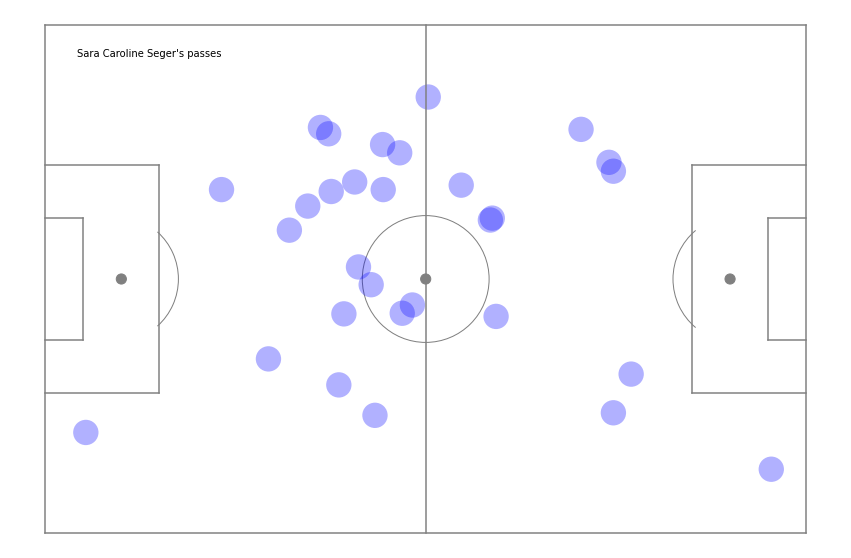

In [0]:
pitchLengthX= 120
pitchWidthY = 80

lista = find_entry_2ndlevel(df_events['player'],'name','Sara Caroline Seger')
#lista = find_entry_2ndlevel(df_events['team'], 'name', "Sweden Women's")
lista_pass = find_not_empty(df_events['pass'])

lista = list(set(lista) & set(lista_pass)) 


fig=plt.figure(figsize=(15, 10))
ax=fig.add_subplot(1,1,1)

createPitch(ax, pitchLengthX, pitchWidthY,'yards')

COLOR = 'blue'
circleSize = 2
for i in lista:
  #location
  x = df_events['location'].loc[i][0]
  y = df_events['location'].loc[i][1]  
  
  shotCircle = plt.Circle( ( x, pitchWidthY-y ), circleSize, facecolor = COLOR)
  shotCircle.set_alpha(0.3)

  ax.add_patch(shotCircle)

plt.text( 5, 75, "Sara Caroline Seger's" + ' passes') 

Sara Caroline Seger's passes with arrows

% Sara Caroline Seger: 3.31%
% not empty: 27.99%


Text(5, 75, "Sara Caroline Seger's passes")

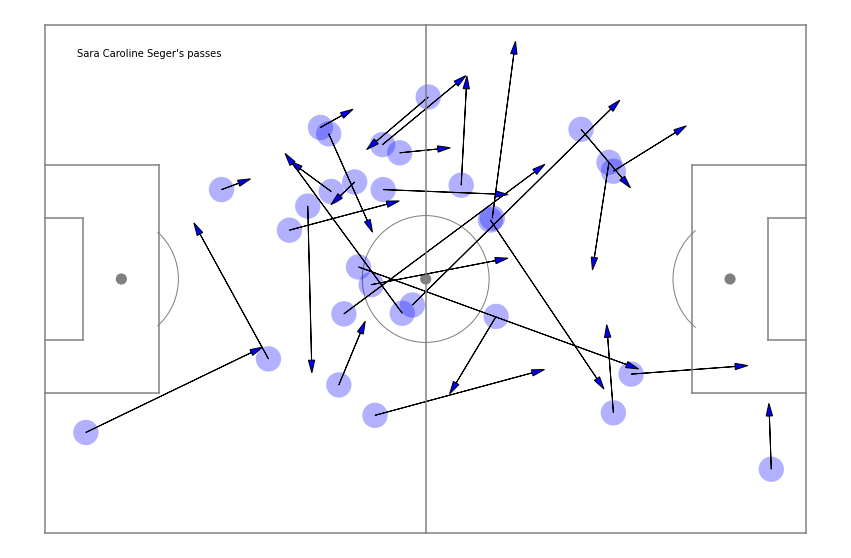

In [0]:
pitchLengthX= 120
pitchWidthY = 80

lista = find_entry_2ndlevel(df_events['player'],'name','Sara Caroline Seger')
#lista = find_entry_2ndlevel(df_events['team'], 'name', "Sweden Women's")
lista_pass = find_not_empty(df_events['pass'])

lista = list(set(lista) & set(lista_pass))

#lista = [1921]
#print(lista)

fig=plt.figure(figsize=(15, 10))
ax=fig.add_subplot(1,1,1)

createPitch(ax, pitchLengthX, pitchWidthY,'yards')

COLOR = 'blue'
HEAD_WIDTH = 1
HEAD_LENGTH= 2
for i in lista:
  #location
  x = df_events['location'].loc[i][0]
  y = df_events['location'].loc[i][1]  

  dx = df_events['pass'].loc[i]['end_location'][0]
  #x1 = pitchLengthX-x1
  dx = dx-x
  dy = df_events['pass'].loc[i]['end_location'][1]  
  dy = dy-y 

  ax.arrow(x, pitchWidthY-y, dx, dy, facecolor = COLOR, head_width=HEAD_WIDTH, head_length=HEAD_LENGTH)

  shotCircle = plt.Circle( ( x, pitchWidthY-y ), circleSize, facecolor = COLOR)
  shotCircle.set_alpha(0.3)
  ax.add_patch(shotCircle)


plt.text( 5, 75, "Sara Caroline Seger's" + ' passes') 